In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("Tamil.jpg")
image.shape

(661, 734, 3)

In [3]:
def imshow(image, ax = None, title= None):
    if ax is None:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
    else:
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.axis('off')

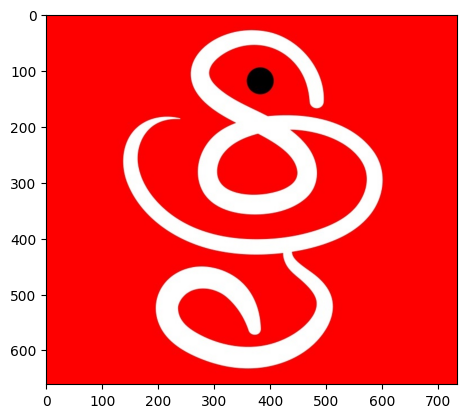

In [4]:
imshow(image)

# Segmentation

## Threshold

In [5]:
def threshold_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img

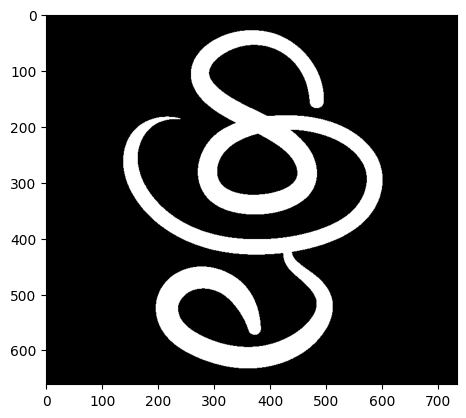

In [6]:
t_image = threshold_segmentation(image)
imshow(t_image)

## Adaptive Threshold

In [7]:
def adaptive_threshold_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return img

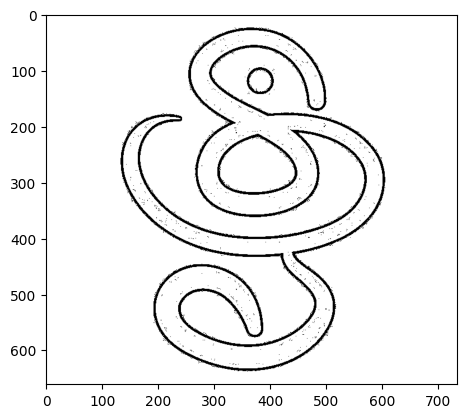

In [8]:
at_image = adaptive_threshold_segmentation(image)
imshow(at_image)

## Watershed Algorithm

In [9]:
def watershed_algorithm(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
    
    #background
    sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
    imshow(sure_bg, axes[0,0])
    axes[0, 0].set_title('Sure Background')

    #distance between white pixel and neighbouring black pixel
    dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
    imshow(dist, axes[0,1])
    axes[0, 1].set_title('Distance Transform')

    #foreground
    _, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)  
    imshow(sure_fg, axes[1,0])
    axes[1, 0].set_title('Sure Foreground')
    
    #difference between foreground and background
    bg_fg_diff = cv2.subtract(sure_bg, sure_fg)
    imshow(bg_fg_diff, axes[1,1])
    axes[1, 1].set_title('Foreground - Background Difference')
    
    _, markers = cv2.connectedComponents(sure_fg)
 
    markers += 1
    markers[bg_fg_diff == 255] = 0

    axes[2,0].imshow(markers, cmap="tab20b")
    axes[2,0].set_title("Marker Image")
    axes[2,0].axis('off')
    
    markers = cv2.watershed(image, markers)
 
    axes[2,1].imshow(markers, cmap="tab20b")
    axes[2,1].axis('off')
    axes[2,1].set_title("Markers")
    plt.show()
    
    labels = np.unique(markers)
    
    tamil = []
    for label in labels[2:]:  
 
        target = np.where(markers == label, 255, 0).astype(np.uint8)

        contours, hierarchy = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        tamil.append(contours[0])
    
    img_copy= np.copy(image)
    img = cv2.drawContours(img_copy, tamil, -1, color=(0, 150, 0), thickness=4)
    imshow(img, title='final output')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


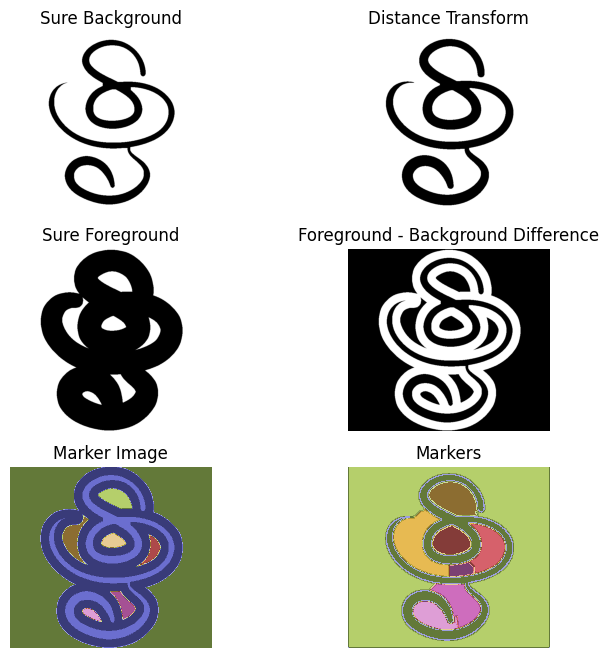

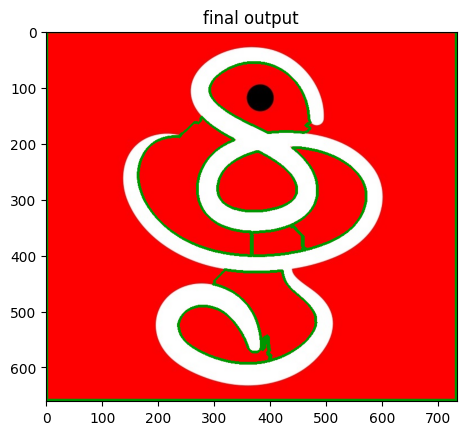

In [10]:
watershed_algorithm(image)

<h3>For the given image, Adaptive thresholding works better than watershed and normal thresholding

# Morphological Transformations

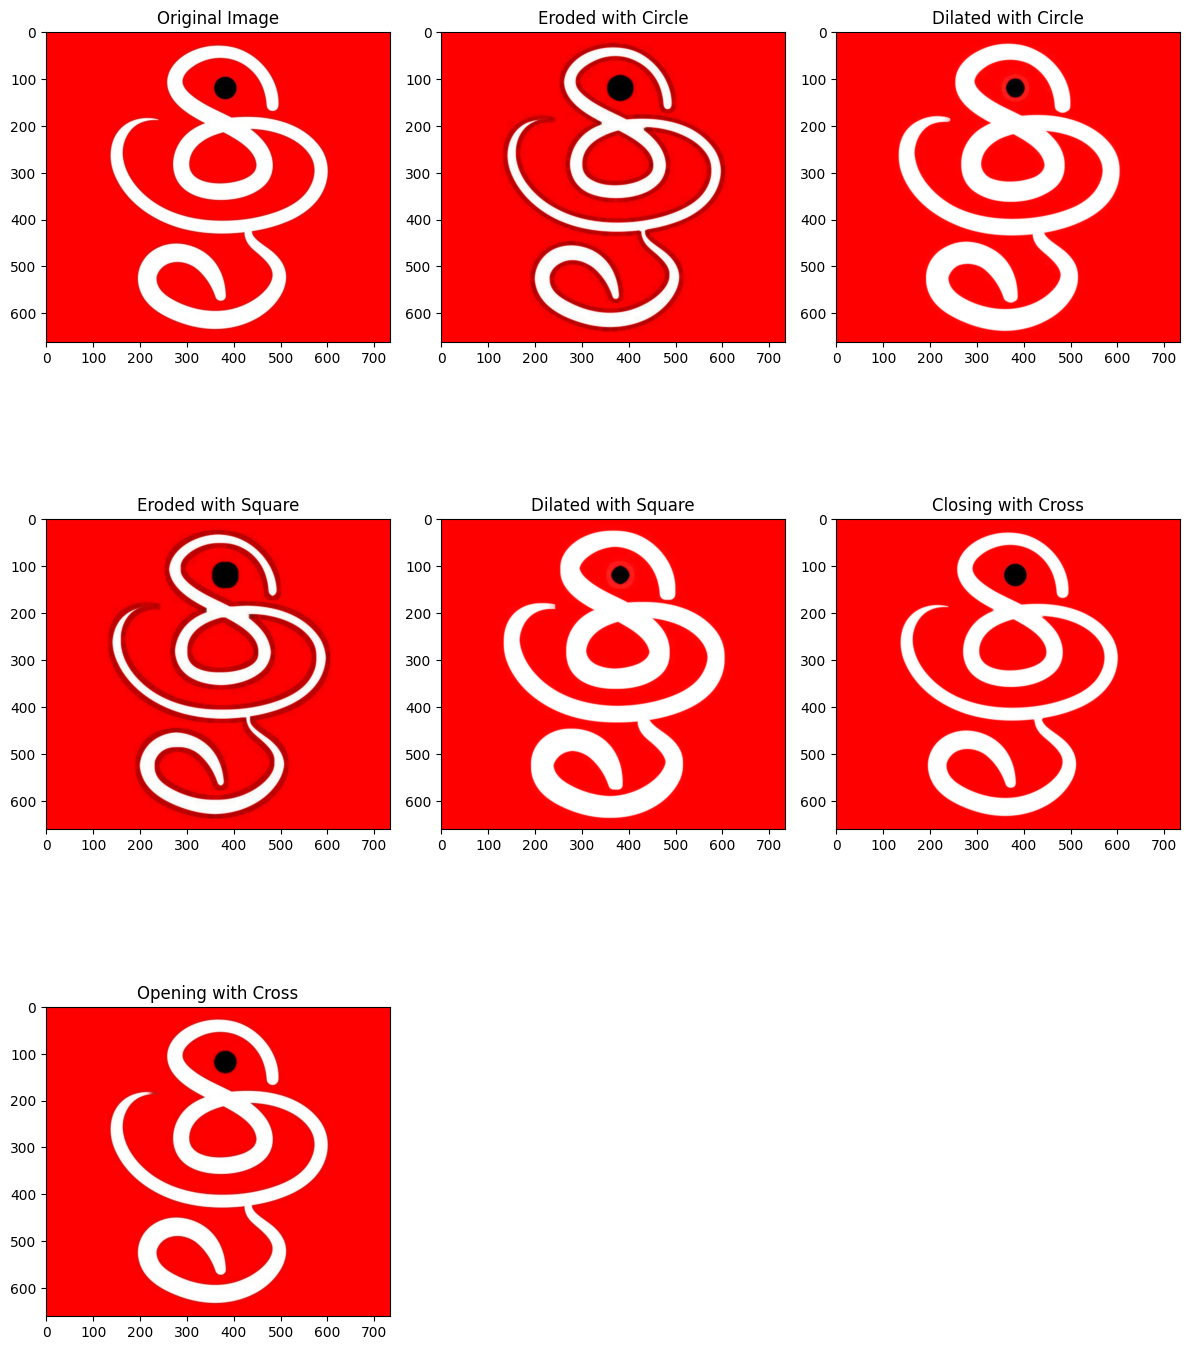

In [11]:
circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

square_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

eroded_circle = cv2.erode(image, circle_kernel, iterations=2)
dilated_circle = cv2.dilate(image, circle_kernel, iterations=2)

eroded_square = cv2.erode(image, square_kernel, iterations=2)
dilated_square = cv2.dilate(image, square_kernel, iterations=2)

closing_cross = cv2.morphologyEx(image, cv2.MORPH_CLOSE, cross_kernel)
opening_cross = cv2.morphologyEx(image, cv2.MORPH_OPEN, cross_kernel)

plt.figure(figsize=(12, 15))

plt.subplot(3, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(3, 3, 2), plt.imshow(cv2.cvtColor(eroded_circle, cv2.COLOR_BGR2RGB))
plt.title('Eroded with Circle')

plt.subplot(3, 3, 3), plt.imshow(cv2.cvtColor(dilated_circle, cv2.COLOR_BGR2RGB))
plt.title('Dilated with Circle')

plt.subplot(3, 3, 4), plt.imshow(cv2.cvtColor(eroded_square, cv2.COLOR_BGR2RGB))
plt.title('Eroded with Square')

plt.subplot(3, 3, 5), plt.imshow(cv2.cvtColor(dilated_square, cv2.COLOR_BGR2RGB))
plt.title('Dilated with Square')

plt.subplot(3, 3, 6), plt.imshow(cv2.cvtColor(closing_cross, cv2.COLOR_BGR2RGB))
plt.title('Closing with Cross')

plt.subplot(3, 3, 7), plt.imshow(cv2.cvtColor(opening_cross, cv2.COLOR_BGR2RGB))
plt.title('Opening with Cross')

plt.tight_layout()
plt.show()


# Histogram Equalization

## Normal Equalization

In [55]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray_img)

Text(0.5, 1.0, 'Histogram Equilization')

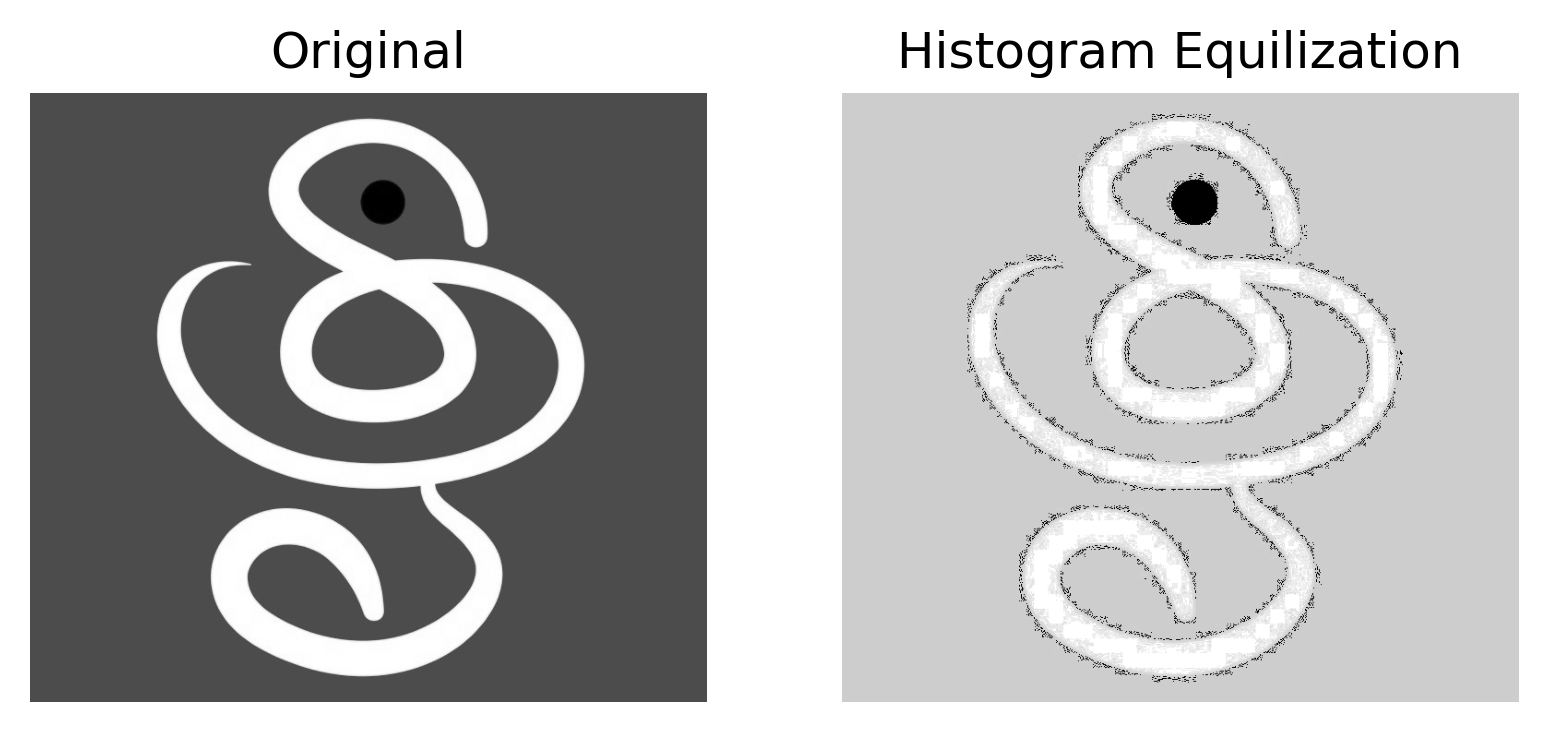

In [56]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_GRAY2RGB))
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(hist_eq, cv2.COLOR_GRAY2RGB))
plt.axis("off")
plt.title("Histogram Equilization")

## Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [58]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray_img)

Text(0.5, 1.0, 'CLAHE')

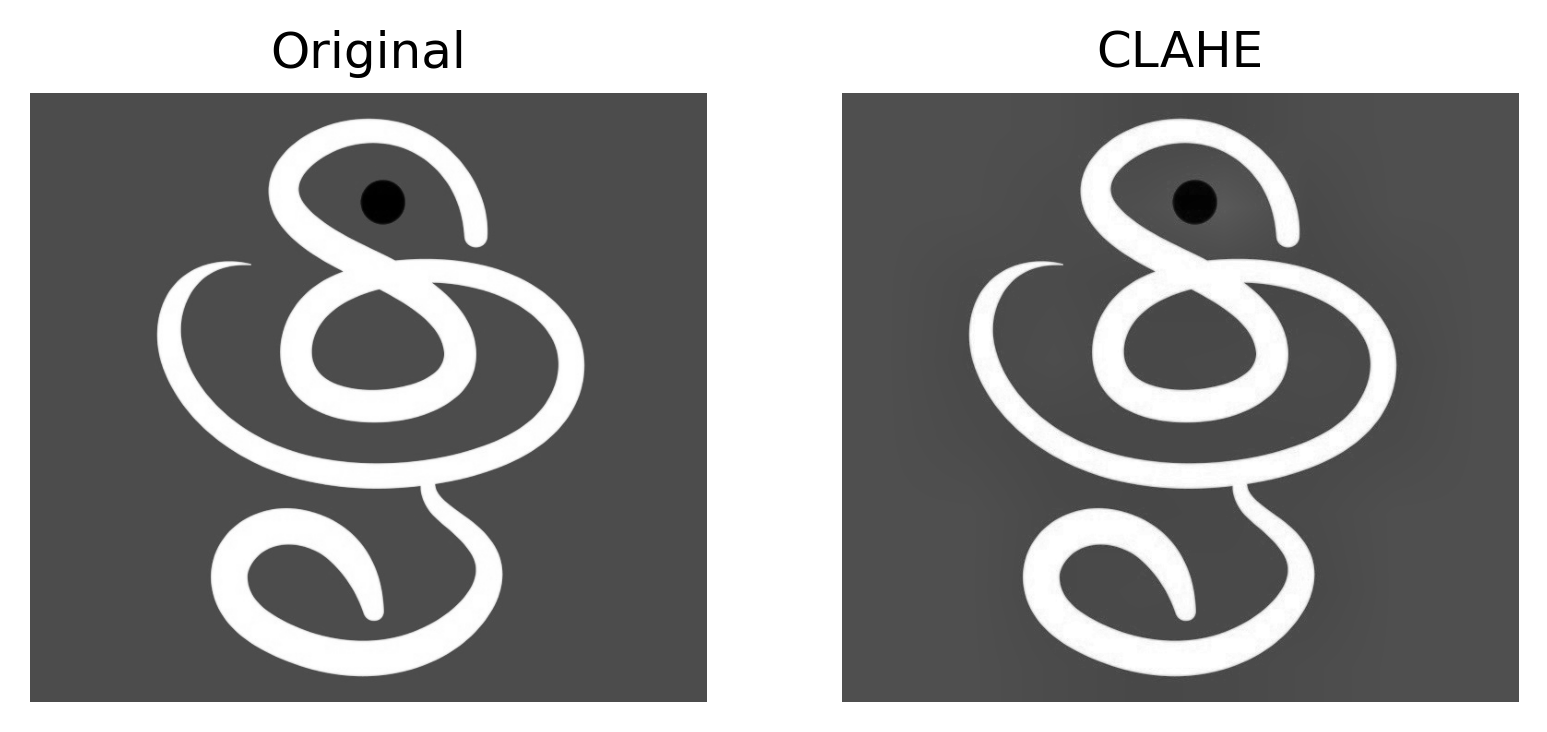

In [64]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_GRAY2RGB))
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB))
plt.axis("off")
plt.title("CLAHE")